# Exploring Diffs in the NDP Plain Text File

In [14]:
# library imports
import csv
import nltk
import pandas as pd
import numpy as np

In [21]:
# import NDP file (~3GB of plain text)
ndp_file = "../227-www-ndp-ca.txt"

In [22]:
# load the NDP plain text as a dataframe
df = pd.read_csv(ndp_file, sep = ",", usecols=[0,1,2,3], header=None, error_bad_lines=False, quoting=csv.QUOTE_NONE)
df = df.sort_values(0)

In [23]:
# find a homepage to focus on for the diffs
homepages = df.loc[df[2] == "http://www.ndp.ca/"]
print(homepages)

                0           1                   2  \
318290  (20051007  www.ndp.ca  http://www.ndp.ca/   
320071  (20051010  www.ndp.ca  http://www.ndp.ca/   
789760  (20051013  www.ndp.ca  http://www.ndp.ca/   
20421   (20051016  www.ndp.ca  http://www.ndp.ca/   
291158  (20051019  www.ndp.ca  http://www.ndp.ca/   
241282  (20051027  www.ndp.ca  http://www.ndp.ca/   
291703  (20051103  www.ndp.ca  http://www.ndp.ca/   
732803  (20051107  www.ndp.ca  http://www.ndp.ca/   
499578  (20051110  www.ndp.ca  http://www.ndp.ca/   
590959  (20060222  www.ndp.ca  http://www.ndp.ca/   
743849  (20060324  www.ndp.ca  http://www.ndp.ca/   
465132  (20060423  www.ndp.ca  http://www.ndp.ca/   
336310  (20060523  www.ndp.ca  http://www.ndp.ca/   
420550  (20060622  www.ndp.ca  http://www.ndp.ca/   
340121  (20060722  www.ndp.ca  http://www.ndp.ca/   
774381  (20060821  www.ndp.ca  http://www.ndp.ca/   
333227  (20060920  www.ndp.ca  http://www.ndp.ca/   
360584  (20061020  www.ndp.ca  http://www.ndp.

In [24]:
# how many homepages are there?
len(homepages)

90

In [25]:
# let's look at one record
# should be the first crawl in the collection
homepages.iloc[0].tolist()

['(20051007',
 'www.ndp.ca',
 'http://www.ndp.ca/',
 "NDP | The New Democratic Party of Canada ABOUT ›\xa0Jack Layton ›\xa0Our Caucus ›\xa0Our History ›\xa0Contact Us GET INVOLVED ›\xa0Your Riding ›\xa0Campaigns ›\xa0Events ›\xa0Youth RESOURCES ›\xa0Press Room ›\xa0Speeches & Articles ›\xa0Downloads ›\xa0e.NDP ›\xa0More... SEARCH ›\xa0Français\xa0 › NDP Budget Details › Jack's Budget Speech › Quotes on NDP Budget › Session in Review Privacy Policy |\xa0Jobs |\xa0RSS © 2005 New Democratic Party"]

In [27]:
# let's now iterate through each pair of pages, diffing them 
# with each other. 
# we then create a list of lists, which can feed into a DF
#

final = []
for y in range (0,len(homepages)-1):
    first_page = homepages.iloc[y].tolist()
    second_page = homepages.iloc[y+1].tolist()
    distance = nltk.edit_distance(first_page[3],second_page[3])
    data = first_page[0],first_page[2],second_page[0],second_page[2],distance
    final.append(list(data))

In [28]:
ndp_diffs = pd.DataFrame(final, columns=['origin_date','origin_url','target_date','target_url','diff'])

In [29]:
# let's see the pages with the largest diffs

sorted = ndp_diffs.sort_values('diff',ascending=False)

In [30]:
sorted

,origin_date,origin_url,target_date,target_url,diff
64,(20140805,http://www.ndp.ca/,(20141105,http://www.ndp.ca/,1475
65,(20141105,http://www.ndp.ca/,(20150206,http://www.ndp.ca/,1420
62,(20140205,http://www.ndp.ca/,(20140505,http://www.ndp.ca/,1232
56,(20120803,http://www.ndp.ca/,(20121103,http://www.ndp.ca/,1231
38,(20080711,http://www.ndp.ca/,(20080930,http://www.ndp.ca/,981
47,(20100503,http://www.ndp.ca/,(20100803,http://www.ndp.ca/,932
67,(20150505,http://www.ndp.ca/,(20150805,http://www.ndp.ca/,932
42,(20090502,http://www.ndp.ca/,(20090802,http://www.ndp.ca/,799
43,(20090802,http://www.ndp.ca/,(20091102,http://www.ndp.ca/,798
76,(20161105,http://www.ndp.ca/,(20170205,http://www.ndp.ca/,773


# Screenshot the Fifteen Biggest Diffs?

In [32]:
biggest_diffs = []
for x in range(0,14):
    biggest_diffs.append("https://wayback.archive-it.org/227/" + sorted.iloc[x].tolist()[2][1:] + "/" + sorted.iloc[x].tolist()[3])

In [33]:
biggest_diffs

['https://wayback.archive-it.org/227/20141105/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20150206/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20140505/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20121103/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20080930/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20100803/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20150805/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20090802/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20091102/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20170205/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20130203/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20140205/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20101103/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20081103/http://www.ndp.ca/']

In [34]:
from selenium import webdriver

DRIVER = 'chromedriver'
driver = webdriver.Chrome(DRIVER)

count=1
for page in biggest_diffs:
    driver.get(page)
    export_file=str(count)+"-ndp.png"
    count=count+1
    screenshot = driver.save_screenshot(export_file)
    
driver.quit()

ModuleNotFoundError: No module named 'selenium'

# Now Let's Screenshot the Ones that These are Coming From?

In [106]:
biggest_diffs = []
for x in range(0,14):
    biggest_diffs.append("https://wayback.archive-it.org/227/" + sorted.iloc[x].tolist()[0][1:] + "/" + sorted.iloc[x].tolist()[1])

In [108]:
biggest_diffs

['https://wayback.archive-it.org/227/20140805/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20141105/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20140205/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20120803/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20080711/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20100503/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20150505/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20090502/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20090802/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20161105/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20121103/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20131105/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20100803/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20080930/http://www.ndp.ca/']

In [109]:
from selenium import webdriver

DRIVER = 'chromedriver'
driver = webdriver.Chrome(DRIVER)

count=1
for page in biggest_diffs:
    driver.get(page)
    export_file=str(count)+"-ORIGIN-ndp.png"
    count=count+1
    screenshot = driver.save_screenshot(export_file)
    
driver.quit()

# Let's Look at the Images

In [110]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [112]:
img=mpimg.imread('/Users/ianmilligan1/dropbox/git/ipsw-quantifying-change/ndp-diff-images/1-ORIGIN-ndp.png')

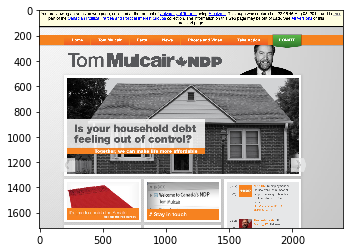

In [116]:
imgplot = plt.imshow(img)
plt.show()

In [136]:
import glob
origin = glob.glob("/Users/ianmilligan1/dropbox/git/ipsw-quantifying-change/ndp-diff-images/*ORIGIN*.png")
target = glob.glob("/Users/ianmilligan1/dropbox/git/ipsw-quantifying-change/ndp-diff-images/*TARGET*.png")

In [151]:
for x in range(len(origin)):
    fig = plt.figure()
    a = fig.add_subplot(1, 2, 1)
    imgplot = plt.imshow(mpimg.imread(origin[x]))
    a.set_title('Before:' + sorted.iloc[x].tolist()[0][1:])
    a = fig.add_subplot(1, 2, 2)
    imgplot = plt.imshow(mpimg.imread(target[x]))
    imgplot.set_clim(0.0, 0.7)
    a.set_title('After:' + sorted.iloc[x].tolist()[2][1:])

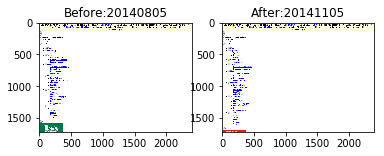

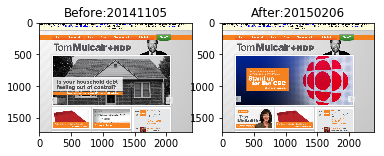

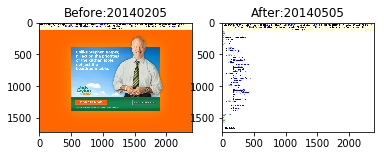

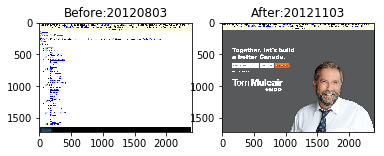

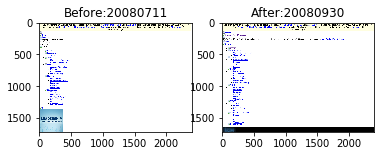

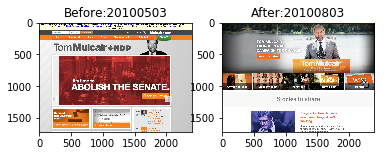

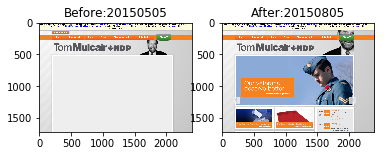

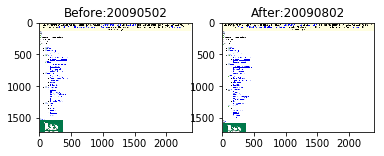

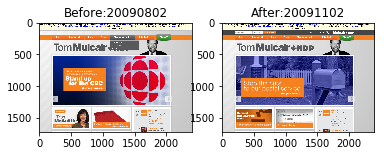

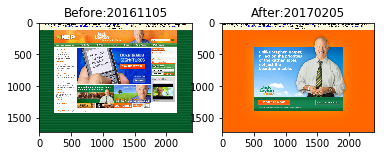

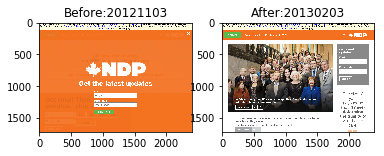

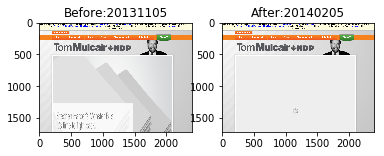

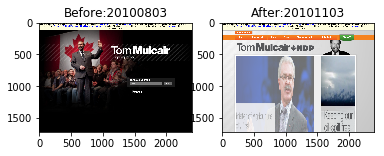

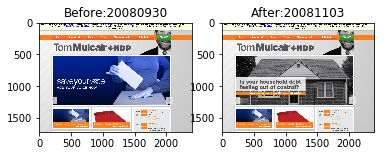

In [152]:
plt.show()

In [148]:
sorted.iloc[x].tolist()[0]

'(20080930'

# Compare Text?

In [12]:
alltext = homepages[3].tolist()

In [13]:
alltext

["Canada's NDP / NPD du Canada Skip to main content Home Tom Mulcair Party ► History ► Our Caucus ► Shadow Cabinet ► Commissions ► Jobs ► Constitution ► Policy Book ► Contact ► Your Riding ► NDP Quebec ► NDP Convention News ► Press Releases ► Statements ► Speeches ► Reality Checks Photos and Video ► Video Gallery ► Photo Gallery ► Logos Take Action ► Join ► Donate ► Volunteer ► Get Email Updates ► Online Tools ► Download the NDP App Donate Take Action \xa0 \xa0 Donate \xa0 Join \xa0 Volunteer \xa0 Get email updates \xa0 Download the NDP app Facebook Twitter RSS YouTube Flickr App Store \xa0 Facebook Twitter RSS YouTube Flickr App Store Menu Donate NDP Français Contact Tom Mulcair - NDP Français \xa0 Previous Next May 04 Retweet ThomasMulcair: Just had the pleasure of speaking to the Nova Scotia #NDP AGM. Great energy here"]

In [167]:
from difflib import SequenceMatcher

In [181]:
s = SequenceMatcher(None, alltext[1],alltext[6])

In [182]:
s.ratio()*100

73.26266195524146

# Header

In [183]:
homepages.iloc[0].tolist()

['(20051007',
 'www.ndp.ca',
 'http://www.ndp.ca/',
 "NDP | The New Democratic Party of Canada ABOUT ›\xa0Jack Layton ›\xa0Our Caucus ›\xa0Our History ›\xa0Contact Us GET INVOLVED ›\xa0Your Riding ›\xa0Campaigns ›\xa0Events ›\xa0Youth RESOURCES ›\xa0Press Room ›\xa0Speeches & Articles ›\xa0Downloads ›\xa0e.NDP ›\xa0More... SEARCH ›\xa0Français\xa0 › NDP Budget Details › Jack's Budget Speech › Quotes on NDP Budget › Session in Review Privacy Policy |\xa0Jobs |\xa0RSS © 2005 New Democratic Party"]

In [188]:
# let's now iterate through each pair of pages, diffing them 
# with each other. 
# we then create a list of lists, which can feed into a DF
#

final = []
for y in range (0,len(homepages)-1):
    first_page = homepages.iloc[y].tolist()
    second_page = homepages.iloc[y+1].tolist()
    seq = SequenceMatcher(None, first_page[3],second_page[3])
    distance = seq.ratio()*100
    data = first_page[0],first_page[2],second_page[0],second_page[2],distance
    final.append(list(data))

In [189]:
final

[['(20051007', 'http://www.ndp.ca/', '(20051010', 'http://www.ndp.ca/', 100.0],
 ['(20051010', 'http://www.ndp.ca/', '(20051013', 'http://www.ndp.ca/', 100.0],
 ['(20051013', 'http://www.ndp.ca/', '(20051016', 'http://www.ndp.ca/', 100.0],
 ['(20051016', 'http://www.ndp.ca/', '(20051019', 'http://www.ndp.ca/', 100.0],
 ['(20051019', 'http://www.ndp.ca/', '(20051027', 'http://www.ndp.ca/', 100.0],
 ['(20051027',
  'http://www.ndp.ca/',
  '(20051103',
  'http://www.ndp.ca/',
  73.26266195524146],
 ['(20051103', 'http://www.ndp.ca/', '(20051107', 'http://www.ndp.ca/', 100.0],
 ['(20051107', 'http://www.ndp.ca/', '(20051110', 'http://www.ndp.ca/', 100.0],
 ['(20051110',
  'http://www.ndp.ca/',
  '(20060222',
  'http://www.ndp.ca/',
  20.18659881255301],
 ['(20060222',
  'http://www.ndp.ca/',
  '(20060324',
  'http://www.ndp.ca/',
  27.05718270571827],
 ['(20060324',
  'http://www.ndp.ca/',
  '(20060423',
  'http://www.ndp.ca/',
  26.522593320235753],
 ['(20060423',
  'http://www.ndp.ca/',


In [190]:
ndp_diffs_sequence = pd.DataFrame(final, columns=['origin_date','origin_url','target_date','target_url','diff'])

In [195]:
sorted = ndp_diffs_sequence.sort_values('diff')

In [196]:
sorted

,origin_date,origin_url,target_date,target_url,diff
88,(20180724,http://www.ndp.ca/,(20180807,http://www.ndp.ca/,0.000000
86,(20180505,http://www.ndp.ca/,(20180724,http://www.ndp.ca/,0.000000
85,(20180505,http://www.ndp.ca/,(20180505,http://www.ndp.ca/,0.000000
87,(20180724,http://www.ndp.ca/,(20180724,http://www.ndp.ca/,0.000000
82,(20180205,http://www.ndp.ca/,(20180205,http://www.ndp.ca/,0.000000
81,(20171105,http://www.ndp.ca/,(20180205,http://www.ndp.ca/,0.000000
61,(20131105,http://www.ndp.ca/,(20140205,http://www.ndp.ca/,0.000000
62,(20140205,http://www.ndp.ca/,(20140505,http://www.ndp.ca/,0.000000
70,(20160205,http://www.ndp.ca/,(20160505,http://www.ndp.ca/,0.000000
71,(20160505,http://www.ndp.ca/,(20160505,http://www.ndp.ca/,0.000000


In [197]:
biggest_diffs = []
for x in range(0,25):
    biggest_diffs.append("https://wayback.archive-it.org/227/" + sorted.iloc[x].tolist()[2][1:] + "/" + sorted.iloc[x].tolist()[3])

In [198]:
biggest_diffs

['https://wayback.archive-it.org/227/20180807/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20180724/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20180505/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20180724/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20180205/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20180205/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20140205/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20140505/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20160505/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20160505/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20160805/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20160805/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20170205/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20161105/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20100803/http://www.ndp.c

In [199]:
from selenium import webdriver

DRIVER = 'chromedriver'
driver = webdriver.Chrome(DRIVER)

count=1
for page in biggest_diffs:
    driver.get(page)
    export_file=str(count)+"-TARGET-SEQUENCER-ndp.png"
    count=count+1
    screenshot = driver.save_screenshot(export_file)
    
driver.quit()

In [200]:
biggest_diffs = []
for x in range(0,14):
    biggest_diffs.append("https://wayback.archive-it.org/227/" + sorted.iloc[x].tolist()[0][1:] + "/" + sorted.iloc[x].tolist()[1])

In [201]:
biggest_diffs #these are the origins

['https://wayback.archive-it.org/227/20180724/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20180505/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20180505/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20180724/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20180205/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20171105/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20131105/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20140205/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20160205/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20160505/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20160505/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20160805/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20161105/http://www.ndp.ca/',
 'https://wayback.archive-it.org/227/20161105/http://www.ndp.ca/']

In [202]:
from selenium import webdriver

DRIVER = 'chromedriver'
driver = webdriver.Chrome(DRIVER)

count=1
for page in biggest_diffs:
    driver.get(page)
    export_file=str(count)+"-ORIGIN-SEQUENCER-ndp.png"
    count=count+1
    screenshot = driver.save_screenshot(export_file)
    
driver.quit()

In [203]:
import glob
origin = glob.glob("/Users/ianmilligan1/dropbox/git/ipsw-quantifying-change/*ORIGIN*.png")
target = glob.glob("/Users/ianmilligan1/dropbox/git/ipsw-quantifying-change/*TARGET*.png")

for x in range(len(origin)):
    fig = plt.figure()
    a = fig.add_subplot(1, 2, 1)
    imgplot = plt.imshow(mpimg.imread(origin[x]))
    a.set_title('Before:' + sorted.iloc[x].tolist()[0][1:])
    a = fig.add_subplot(1, 2, 2)
    imgplot = plt.imshow(mpimg.imread(target[x]))
    imgplot.set_clim(0.0, 0.7)
    a.set_title('After:' + sorted.iloc[x].tolist()[2][1:])

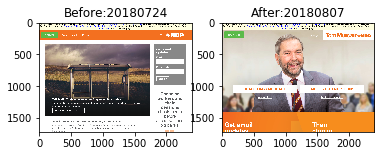

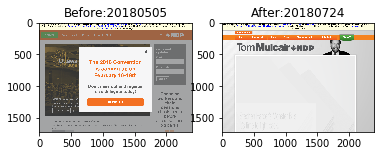

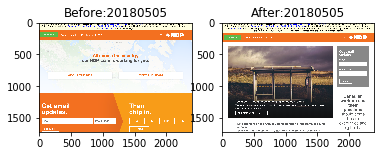

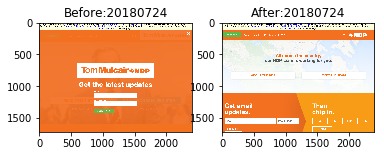

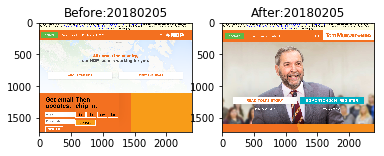

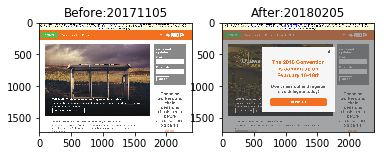

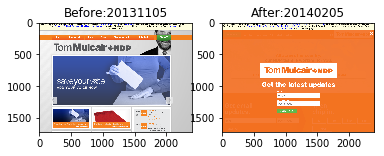

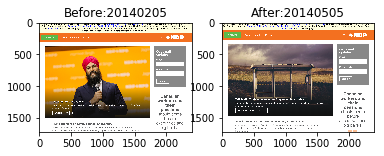

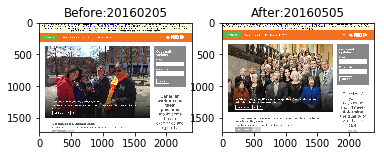

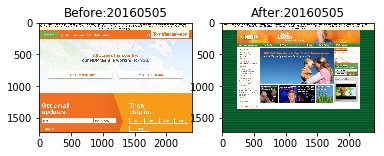

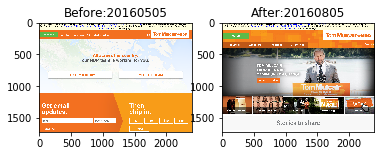

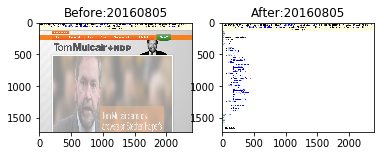

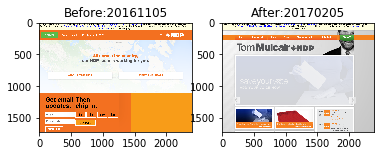

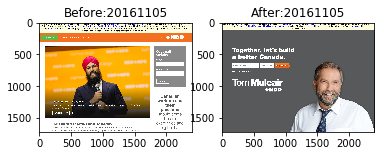

In [204]:
plt.show()